<h1 style='text-align: center'>Welcome to Project 1! &#128522;</h1>

The dataset that I will be using to answer this question came from Kaggle. It contains global data such as GDP, life expectancy, education information, and health information, to say the least. Each row represents one of the 204 countries represented in this dataset. Some key features include name, pop_density, co2_emissions, urban_population, urban_population_growth, and forested_area. The dataset is about 204 rows with 38 columns, so it contains over 7700 cells of information total. 


Link to Kaggle dataset: https://www.kaggle.com/datasets/arslaan5/global-data-gdp-life-expectancy-and-more

Research question: Are we able to see if there is a possible correlation between the population of people living in urban areas vs the amount of CO2 exposure there is?

In [ ]:
import numpy as np # used for statistical purposes
import pandas as pd # used for dataframing
import matplotlib.pyplot as plt # used for plotting simple visualizations
import seaborn as sns # used for more advanced and prettier visualizations

In [120]:
data = pd.read_csv("C:/Users/marih/Downloads/country_data.csv") #importing the data file --> this might have to be changed based on your path file!

In [3]:
data = pd.DataFrame(data) # created a dataframe in order to create a subset of the original data! Used for creating a scatterplot and getting rid of columns that are not needed!

In [ ]:
data.head(11) #let's see what this dataset looks like!

,gdp,sex_ratio,surface_area,life_expectancy_male,unemployment,imports,homicide_rate,currency,iso2,employment_services,...,pop_growth,region,pop_density,internet_users,gdp_per_capita,fertility,refugees,primary_school_enrollment_male,co2_emissions,tourists
0,20514.0,105.4,652864.0,62.8,11.2,8370.0,6.7,"{'code': 'AFN', 'name': 'Afghani'}",AF,39.4,...,2.5,Southern Asia,59.6,13.5,551.9,4.6,2826.4,124.2,NaN,NaN
1,15059.0,103.7,28748.0,76.7,12.8,5908.0,2.3,"{'code': 'ALL', 'name': 'Lek'}",AL,43.7,...,-0.1,Southern Europe,105.0,71.8,5223.8,1.6,4.3,105.2,4.3,5340.0
2,173757.0,102.1,2381741.0,75.4,11.5,45140.0,1.4,"{'code': 'DZD', 'name': 'Algerian Dinar'}",DZ,59.6,...,2.0,Northern Africa,18.4,49.0,4114.7,3.0,99.5,112.4,130.5,2657.0
3,3238.0,102.3,468.0,NaN,NaN,1538.0,0.0,"{'code': 'EUR', 'name': 'Euro'}",AD,NaN,...,-0.2,Southern Europe,164.2,91.6,42051.6,1.2,NaN,NaN,NaN,3042.0
4,105902.0,97.9,1246700.0,57.8,6.8,21340.0,4.8,"{'code': 'AOA', 'name': 'Kwanza'}",AO,41.7,...,3.3,Middle Africa,26.4,14.3,3437.3,5.6,70.1,121.1,18.0,218.0
5,1611.0,93.3,442.0,75.7,NaN,568.0,11.1,"{'code': 'XCD', 'name': 'E. Caribbean Dollar'}",AG,81.6,...,0.9,Caribbean,222.6,76.0,16727.0,2.0,0.2,105.4,NaN,269.0
6,518475.0,95.3,2780400.0,73.0,10.4,49125.0,5.3,"{'code': 'ARS', 'name': 'Argentine Peso'}",AR,78.9,...,1.0,South America,16.5,74.3,11687.6,2.3,165.6,109.9,183.4,6942.0
7,12433.0,88.8,29743.0,71.1,16.6,5053.0,1.7,"{'code': 'AMD', 'name': 'Armenian Dram'}",AM,53.6,...,0.3,Western Asia,104.1,64.7,4212.1,1.8,19.0,92.7,5.2,1652.0
8,1453871.0,99.2,7692060.0,81.2,5.3,221481.0,0.9,"{'code': 'AUD', 'name': 'Australian Dollar'}",AU,77.7,...,1.3,Oceania,3.3,86.5,58392.7,1.8,129.2,100.3,384.6,9246.0
9,455508.0,97.2,83871.0,78.9,4.8,176596.0,1.0,"{'code': 'EUR', 'name': 'Euro'}",AT,71.5,...,0.7,Western Europe,109.3,87.5,51230.3,1.5,163.7,103.2,64.9,30816.0


We can see that this dataset contains null values in various places, which we will cover later on!

In [ ]:
data.dtypes # let's see what kind of data types we are working with for each feature (38 features)

gdp                                   float64
sex_ratio                             float64
surface_area                          float64
life_expectancy_male                  float64
unemployment                          float64
imports                               float64
homicide_rate                         float64
currency                               object
iso2                                   object
employment_services                   float64
employment_industry                   float64
urban_population_growth               float64
secondary_school_enrollment_female    float64
employment_agriculture                float64
capital                                object
forested_area                         float64
exports                               float64
life_expectancy_female                float64
post_secondary_enrollment_female      float64
post_secondary_enrollment_male        float64
primary_school_enrollment_female      float64
infant_mortality                  

# DATA CLEANING

In [ ]:
new_data = data[["urban_population_growth", "forested_area", "urban_population", "name", "region", "co2_emissions"]] # creating the subset for the important features!

In [ ]:
new_data # just printing out the new dataset to see if everything came through correctly

,urban_population_growth,forested_area,urban_population,name,region,co2_emissions
0,4.0,2.1,25.8,Afghanistan,Southern Asia,NaN
1,1.8,28.2,61.2,Albania,Southern Europe,4.3
2,2.9,0.8,73.2,Algeria,Northern Africa,130.5
3,-1.7,34.0,88.0,Andorra,Southern Europe,NaN
4,4.7,46.4,66.2,Angola,Middle Africa,18.0
...,...,...,...,...,...,...
199,1.4,52.9,88.2,"Venezuela, Bolivarian Republic Of",South America,113.7
200,3.2,47.6,36.6,Viet Nam,South-Eastern Asia,191.2
201,4.4,1.0,37.3,Yemen,Western Asia,8.9
202,4.3,65.4,44.1,Zambia,Eastern Africa,6.0


In [ ]:
# using this to weed out any regions that have no co2 emissions! I feel like if I were to put 0 emissions that would create bad data!
print(new_data["co2_emissions"].isnull().sum()) # this prints out the amount of nulls we have for this column


59


In [9]:
cleaned_data = new_data.dropna(subset=["co2_emissions"]) # getting rid of the null values that are in the co2_emissions column!
cleaned_data.columns # shows that this is a subset of the original dataset, which contains the features that we actually want to focus on!

Index(['urban_population_growth', 'forested_area', 'urban_population', 'name',
       'region', 'co2_emissions'],
      dtype='object')

In [10]:
print(cleaned_data["co2_emissions"].isnull().sum()) # this shows that the cleaning worked! should be 0.

0


In [ ]:
cleaned_data # showing the amount of observations that are now in cleaned_data vs what was in the subset dataset of new_data!

,urban_population_growth,forested_area,urban_population,name,region,co2_emissions
1,1.8,28.2,61.2,Albania,Southern Europe,4.3
2,2.9,0.8,73.2,Algeria,Northern Africa,130.5
4,4.7,46.4,66.2,Angola,Middle Africa,18.0
6,1.2,9.9,92.0,Argentina,South America,183.4
7,0.2,11.7,63.2,Armenia,Western Asia,5.2
...,...,...,...,...,...,...
199,1.4,52.9,88.2,"Venezuela, Bolivarian Republic Of",South America,113.7
200,3.2,47.6,36.6,Viet Nam,South-Eastern Asia,191.2
201,4.4,1.0,37.3,Yemen,Western Asia,8.9
202,4.3,65.4,44.1,Zambia,Eastern Africa,6.0


# VISUALIZATIONS

Now that we have finished cleaning and processing our dataset, now let's move onto the visualizations!

<Axes: xlabel='Region', ylabel='CO2 Emissions'>

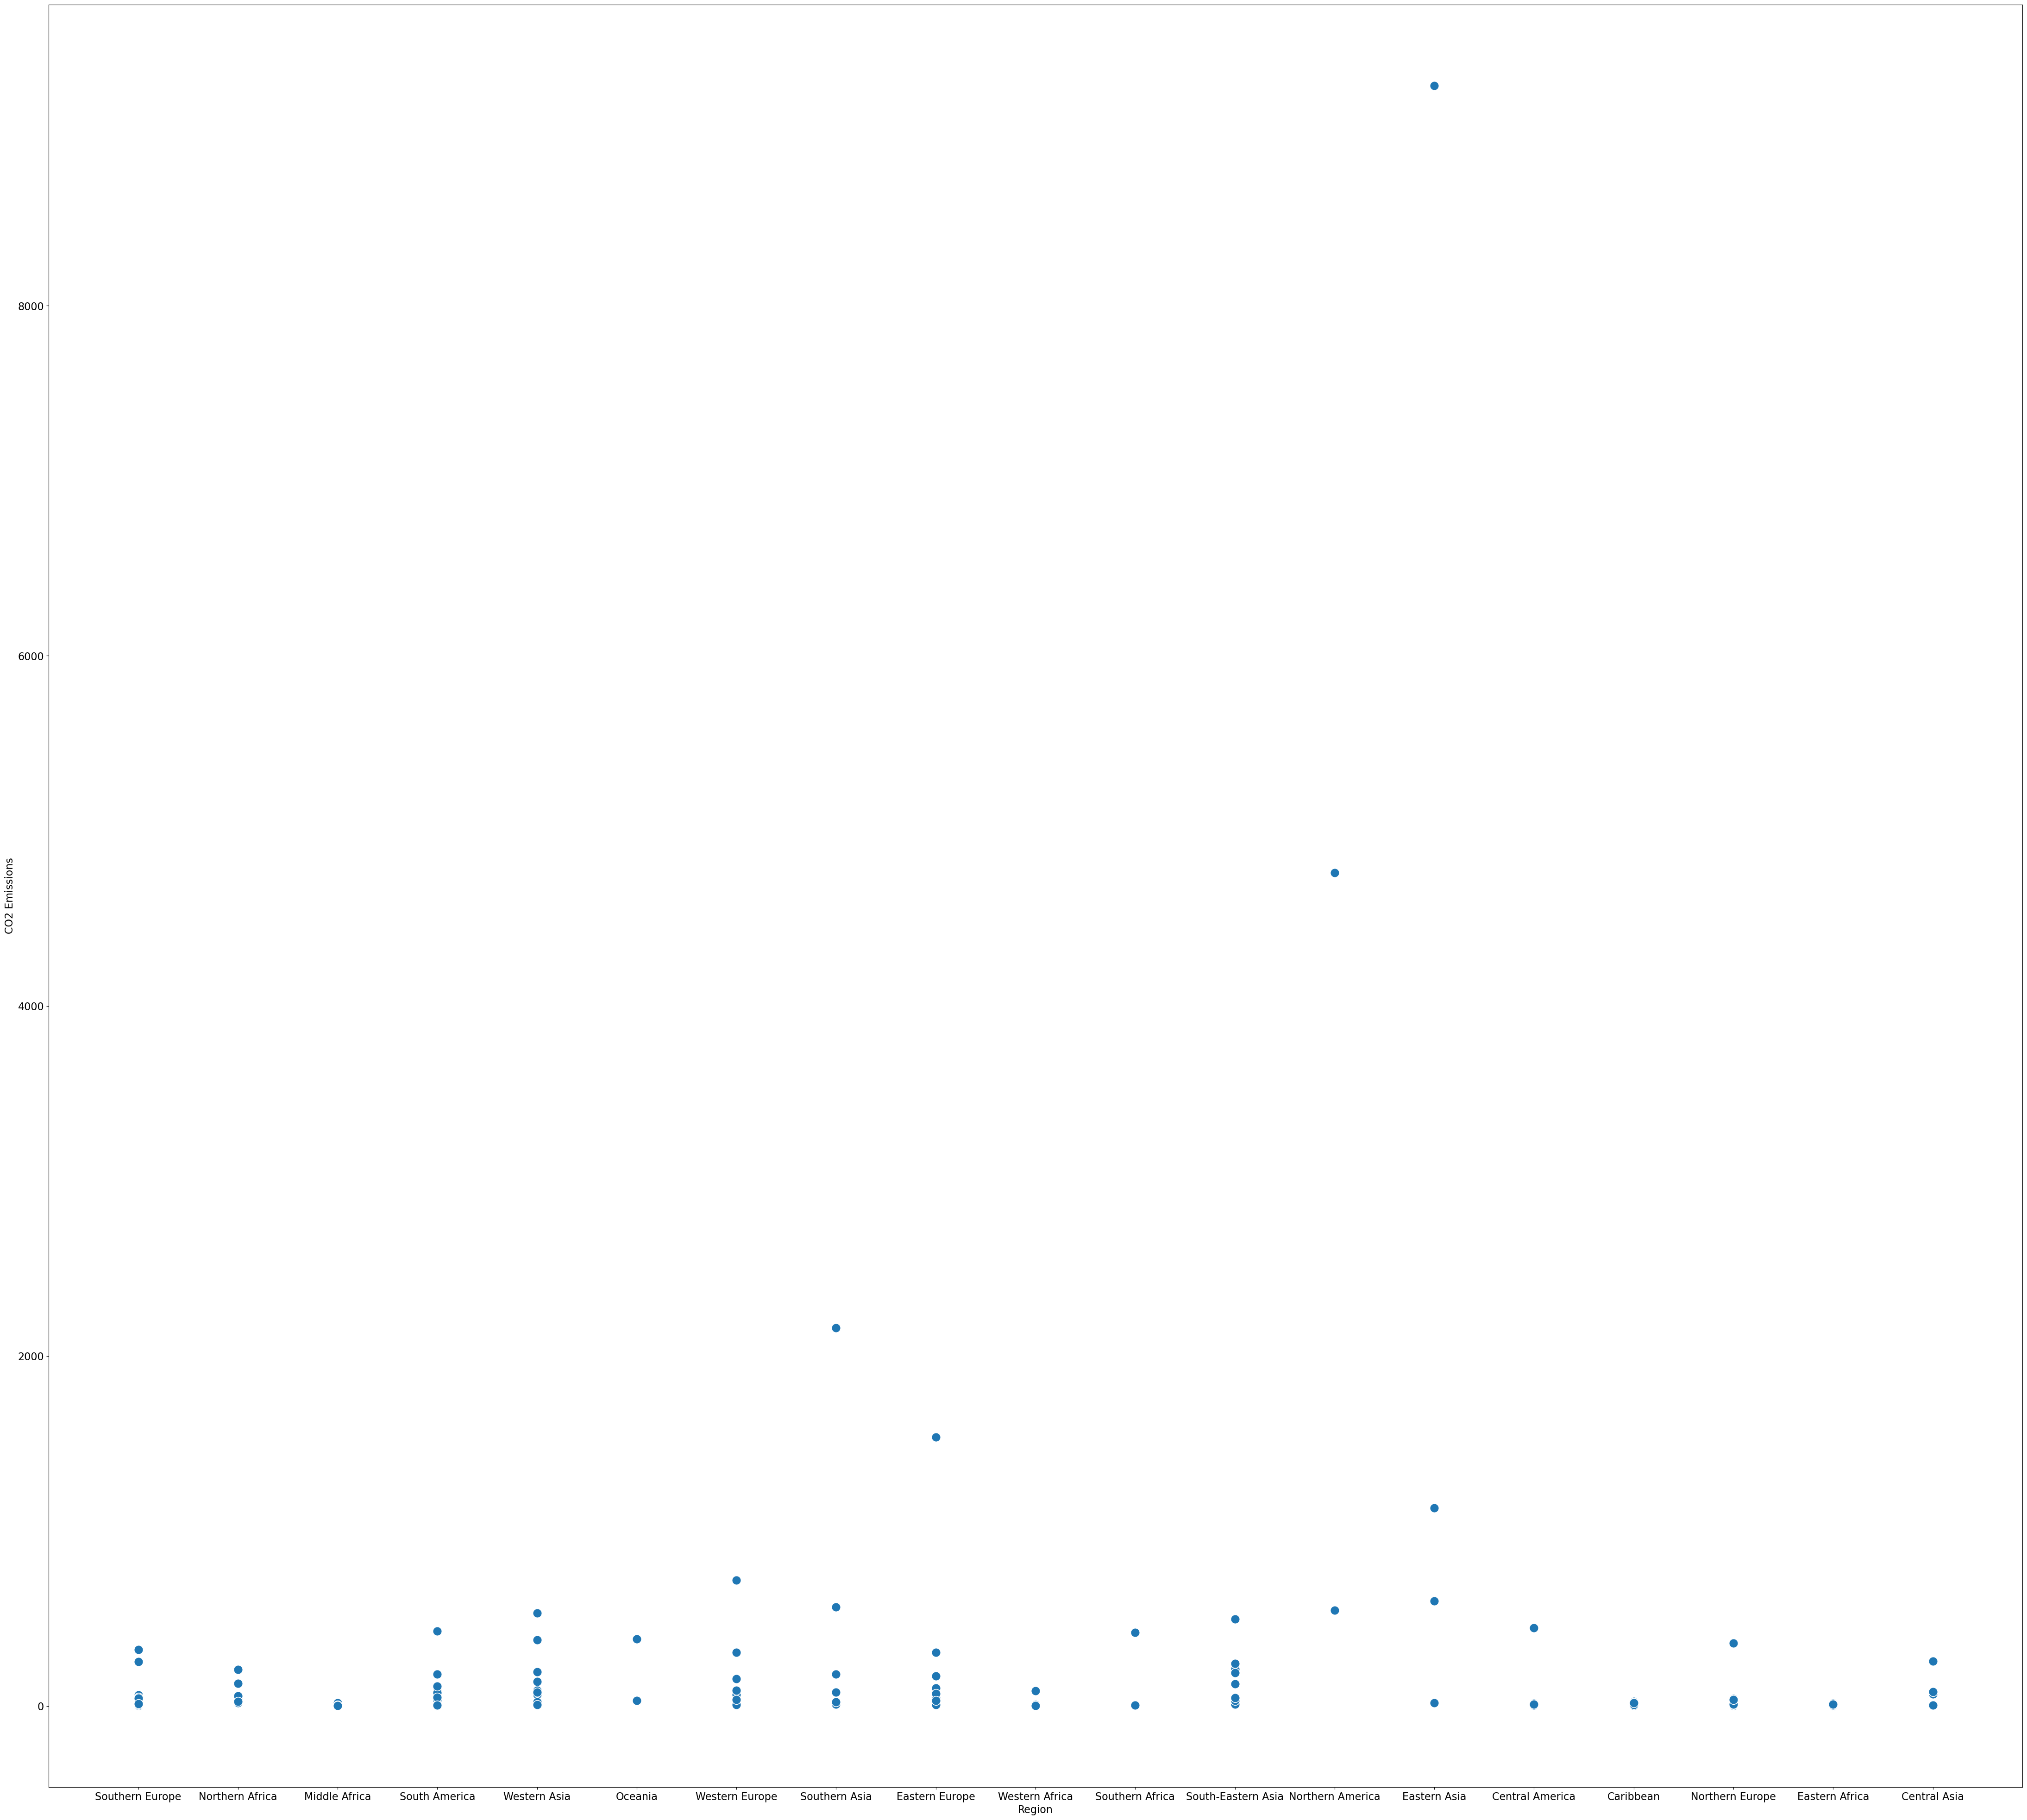

In [123]:
plt.figure(figsize=(55, 50))
plt.xlabel("Region", fontsize=16)
plt.ylabel("CO2 Emissions", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
sns.scatterplot(data=cleaned_data, x=cleaned_data["region"], y=cleaned_data["co2_emissions"], legend='auto', s=200)

From the scatter plot above, you can see that there are major outliers in Northern America and a country in Eastern Asia as well. Let's see if we can see what country specifically contains the outliers!

Since we do have outliers, the best way to represent the entirety of the CO2 emissions would be to use the median! So let's calculate that really quickly.

In [ ]:
median_co2 = np.median(cleaned_data['co2_emissions']) # calculating the median amount of CO2 emissions using numpy

In [147]:
print(median_co2) # displaying out the value of the median CO2 emissions

31.3


In [145]:
countries_medians = cleaned_data[cleaned_data['co2_emissions'] >= median_co2] # storing the countries that have a CO2 emissions count higher than the median amount into a separate variable

In [ ]:
countries_medians 
'''
this shows that 73 countries included in the cleaned_data dataset has a value of CO2 emissions greater than the median. 
So coming from 145 observations originally in cleaned_data, that's about half of the countries that are on the list, gone!
'''

,urban_population_growth,forested_area,urban_population,name,region,co2_emissions
2,2.9,0.8,73.2,Algeria,Northern Africa,130.5
6,1.2,9.9,92.0,Argentina,South America,183.4
8,1.6,16.2,86.1,Australia,Oceania,384.6
9,0.7,46.9,58.5,Austria,Western Europe,64.9
12,2.9,0.8,73.2,Algeria,Northern Africa,130.5
...,...,...,...,...,...,...
193,1.0,13.0,83.7,United Kingdom,Northern Europe,358.7
194,0.9,33.9,82.5,United States,Northern America,4761.3
196,1.5,7.6,50.4,Uzbekistan,Central Asia,81.2
199,1.4,52.9,88.2,"Venezuela, Bolivarian Republic Of",South America,113.7


Let's look at the amount of CO2 emissions per region!

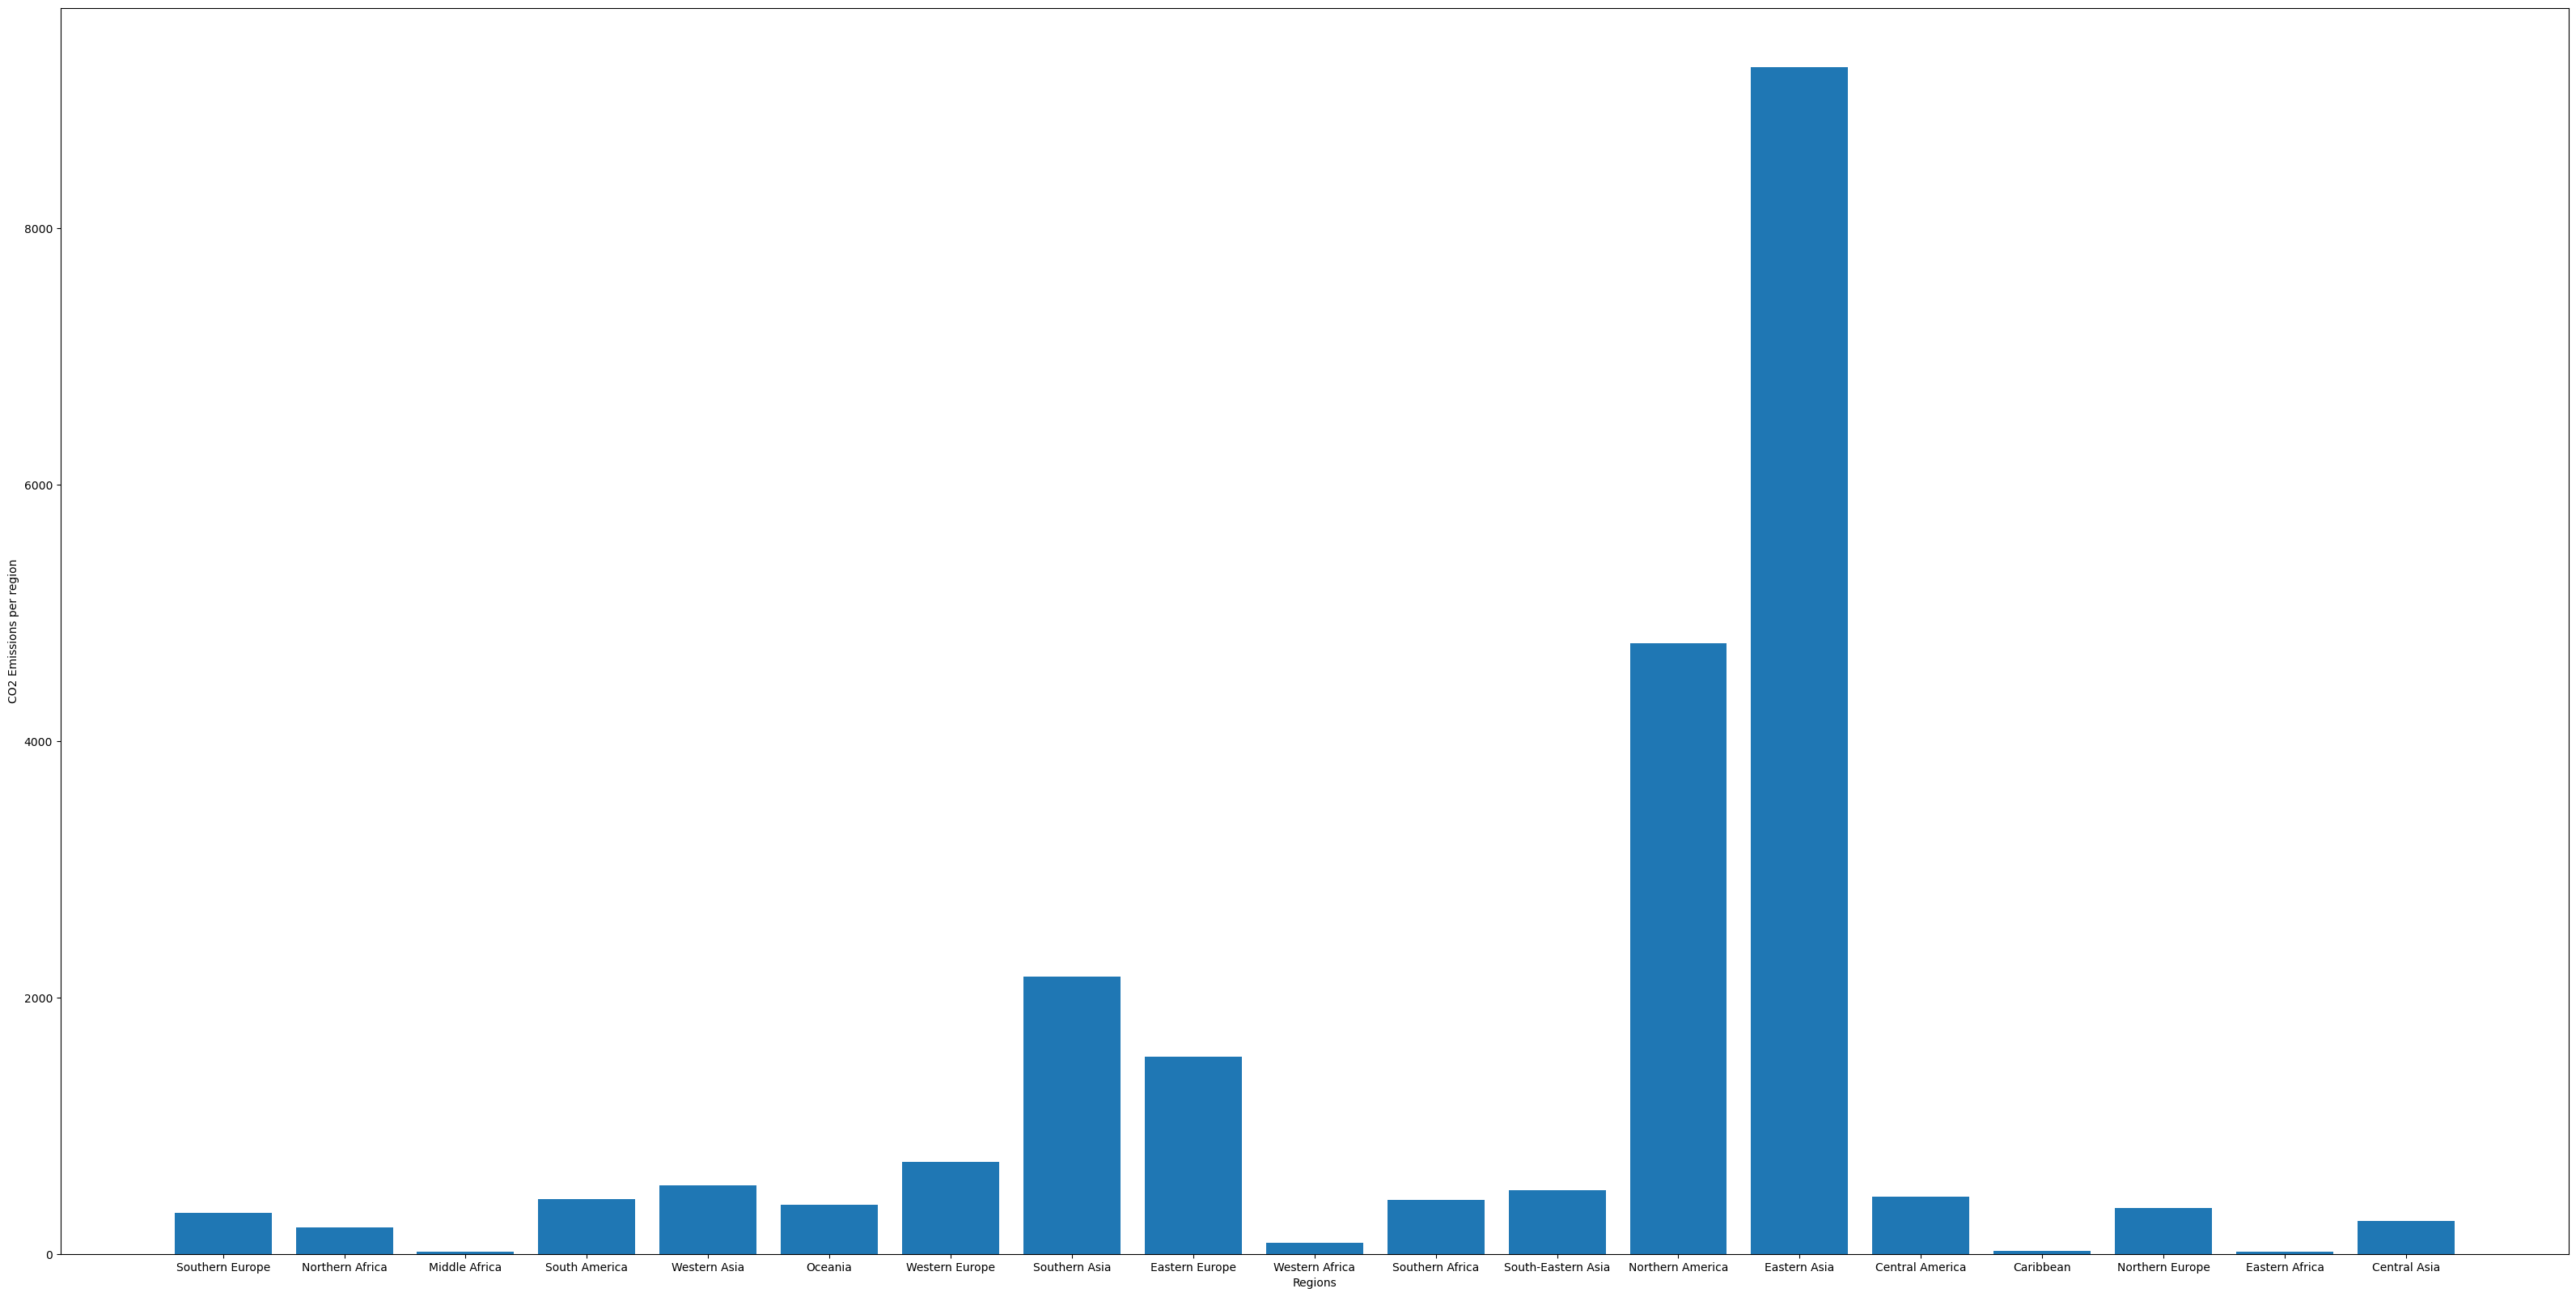

In [64]:
plt.figure(figsize=(40, 20))
plt.xlabel("Regions")
plt.ylabel("CO2 Emissions per region")
plt.bar(cleaned_data['region'], cleaned_data['co2_emissions'])
plt.show()

Above in the barchart is another way to see that there are huge outliers in Northern America and Eastern Asia, as we found earlier as well.

<Axes: xlabel='region', ylabel='urban_population_growth'>

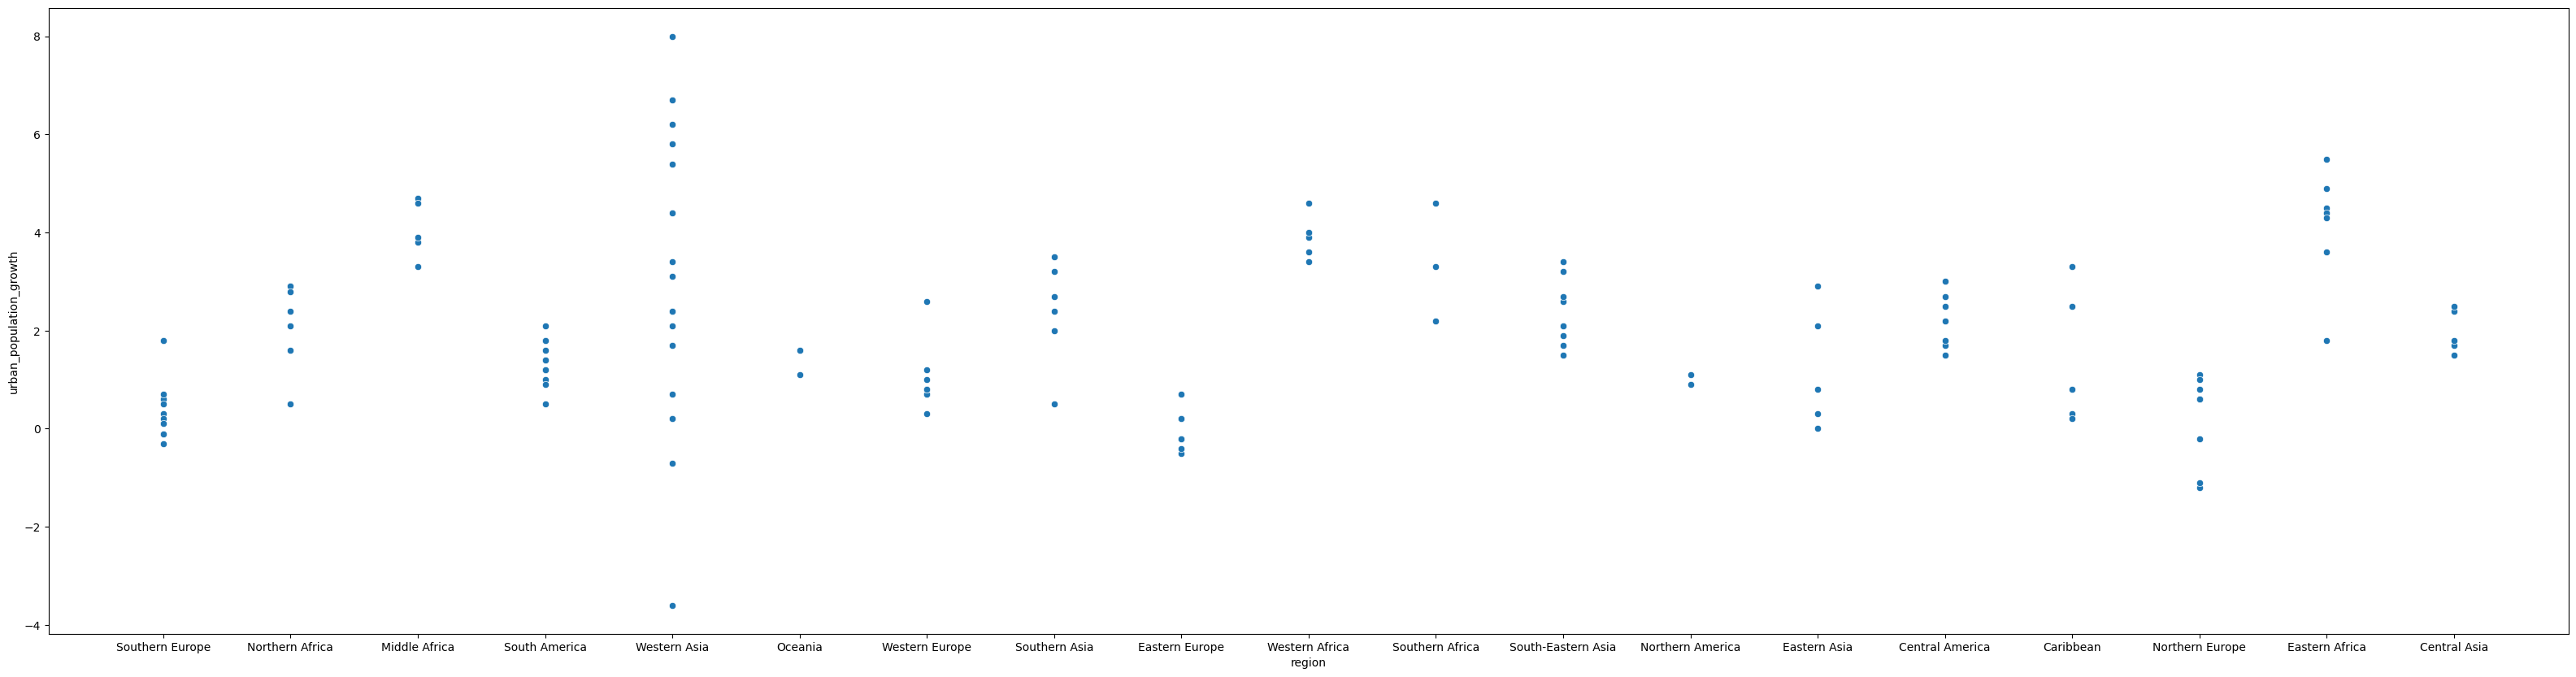

In [105]:
plt.figure(figsize=(40, 10))
sns.scatterplot(data=cleaned_data, x=cleaned_data['region'], y=cleaned_data['urban_population_growth'])

As you can see above, there are a lot of countries that show that they have actually had negative urban population growths, meaning that people are actually leaving that country! If they had a population growth of 0, that means that no one is leaving and that no one is coming in either, which is still something to look into. 

Let's see what countries actually have a high amount of CO2 emissions below

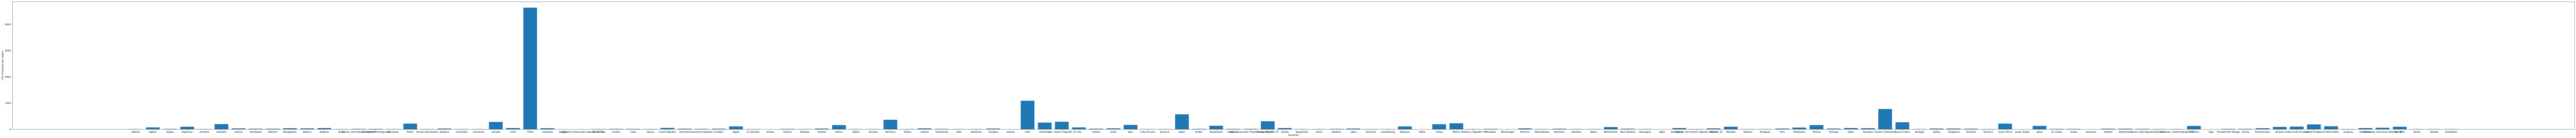

In [144]:
plt.figure(figsize=(200, 10))
plt.xlabel("Countries")
plt.ylabel("CO2 Emissions per region")
plt.bar(cleaned_data['name'], cleaned_data['co2_emissions'])
plt.show() 

From the bar graph above, you can see that there are about 2 leading countries in CO2 emissions

In [ ]:
mean_co2 = np.nanmean(cleaned_data['co2_emissions']) # used from Daniel's week 5 coding demo

In [138]:
print(mean_co2) # the mean amount of CO2 emissions of all regions together

224.6358620689655


In [119]:
countries = cleaned_data[cleaned_data['co2_emissions'] >= mean_co2] # gathering all of the countries that have a CO2 emissions count of higher than the average, which is ~225. 

In [ ]:
countries # prints out the information about the regions with their amounts of CO2 emissions, urban population, and urban population growth.

,urban_population_growth,forested_area,urban_population,name,region,co2_emissions
8,1.6,16.2,86.1,Australia,Oceania,384.6
18,1.6,16.2,86.1,Australia,Oceania,384.6
33,1.2,59.0,86.8,Brazil,South America,427.6
41,1.1,38.7,81.5,Canada,Northern America,547.8
45,2.9,22.1,60.3,China,Eastern Asia,9257.9
70,0.8,31.0,80.7,France,Western Europe,306.1
74,0.3,32.7,77.4,Germany,Western Europe,718.8
86,2.4,23.8,34.5,India,Southern Asia,2161.6
87,2.6,48.5,56.0,Indonesia,South-Eastern Asia,496.4
88,2.0,6.6,75.4,"Iran, Islamic Republic Of",Southern Asia,567.1


From above, you can see that 26 countries have a CO2 emissions amount higher than their urban population. With the United States in Northern America being one of the highest, and China in Eastern Asia being the biggest country with the most emissions. Out of those 26 countries, we can see that only one of the countries, Poland, has a negative urban population growth amount, meaning that people are actually leaving the country!

From the data, we can conclude that it will be unreasonable to say that you can see that based on their urban population that they have higher CO2 emissions. 